## 本チュートリアルの概要
　本チュートリアルでは、「文章」を入力として与えた際に、文章が属する「カテゴリ」を出力する人工知能(AI)を作る方法について解説します。例えば「今日の天気は晴れです」という文章を与えた際に「天気」というカテゴリを、「今日の日経平均株価は？」という文章を与えた際には「経済」のカテゴリの文章だというように、文章のカテゴリを分類して出力するような人工知能です。

### 分類するカテゴリ
　本チュートリアルでは、任意の文章を与えた際に、文章を次のようなカテゴリに分類してくれる人工知能を作ります。
 
 1. 天気
 2. 交通
 3. テクノロジ
 4. 経済

### 人工知能が出力する値
　本チュートリアルで完成させる人工知能は、上記のように文章を4つのカテゴリに分類してくれるわけですが、具体的にどのように文章を分類した結果を教えてくれるのかを先に説明します。

　本チュートリアルで完成させる人工知能は、任意の文章を与えた際に、上記4つのどのカテゴリに当たるかを**確率**で返却します。 次の表の例のように、それぞれのカテゴリごとに自信度のような数値を返却してくれます。

| カテゴリ   | 確率 (自信度) |
|:---------|:------------|
| 天気      | 0.145 |
| 交通      | 0.762 |
| テクノロジ | 0.013 |
| 経済      | 0.080 |

　上の表の例の場合、カテゴリ「交通」が一番確率が高いので、人工知能が与えられた文章から「交通」のカテゴリの文章だと判断したということになります。

## 「モデル」「学習」「教師データ」
　人工知能が物事を判断するための「脳みそ」に当たる部分を**モデル**と言います。 モデルを作るためには、モデルを賢くするための教材となる**教師データ**が必要で、教師データを利用して空っぽのモデル(脳みそ)を賢くすることを**学習**と言います。

### 教師データ
　教師データは、「**データ**」と「**ラベル**(正解データとも言う)」の2つがセットで構成されます。 データは人工知能への入力となるもので、ラベルは人工知能からの出力となるものです。 今回の場合は「文章」が人工知能の入力になる**データ**で、文章を表す「カテゴリ」が「**ラベル**」です。

### 本チュートリアルにおける教師データ
　本チュートリアルでは、筆者が独自に作った次のようなデータを教師データとして利用し、「こういう文章の場合は、このカテゴリだよ」ということを学習させます。

#### データフォーマット
以下のような構造のテキストファイルを用意します。 各項目はカンマで区切ることとします。

| 項目番号 | 項目 |
|:--------|:----|
| 1       | ラベル : カテゴリ名 |
| 2       | データ : 文章に登場する単語 (複数をスペース区切り) |

#### 実際のデータ例
例えば「本日の天気は晴れ、最高気温は26度です」という文章が「天気」というカテゴリだということを教えたい場合は、次のような教師データを用意しました。

    天気,本日 天気 晴れ 最高気温 26度

このような行をたくさん束ねた、以下のようなテキストファイルを学習用データとして利用します。

    天気,本日 天気 晴れ 最高気温 26度
    経済,午前 日経平均株価 終値 20000円
    交通,現在 山手線 外回り 遅延 5分
    天気,週末 都心 初雪 可能性
    テクノロジ,Apple 健康分野 新サービス
    (以下略)

データ行の一番左には「カテゴリ」があり、あとにはカテゴリに関連する名詞が列挙されているように見えます。

## 教師データのベクトル化
　上で述べたように、モデルを学習させるための教師データとして、(1)文章がカテゴリ「天気」だということを表す「ラベル」 と (2)「今日の天気は晴れ、最高気温は26度です」という文章から名詞を抜き出した「データ」のセットをモデルに学習させるわけですが、この文字列のままコンピュータに処理させるのは適さないので、データを別の表現に変換します。 「コンピュータに処理させるのに適した表現」とは、**数値(小数値)ベクトル**です。

### ラベル
　まずは本チュートリアルでは「カテゴリ」を示す「ラベル」について説明します。 4つのカテゴリを「1」「2」「3」「4」のような数値で表したいところですが、そうはしません。 上で説明した「人工知能が出力する値」を思い出してください。 人工知能が最終的に出力するのは各カテゴリごとの確率です。 教師データのラベルも、この形に合わせます。

　モデルを学習させる時点において、例えば「今日の天気は晴れです、最高気温は26度です」をカテゴリ「天気」だと教育したい場合、「今日の天気は〜」の文章がカテゴリ「天気」である確率は100%です。 よって、上記4つのカテゴリの順序を「天気」「交通」「テクノロジ」「経済」とした場合、それぞれのカテゴリの確率を、次のような数値の配列で表すことができます。

    [1, 0, 0, 0]

　このような値を教師データのラベルの値とします。

### データ
　次にデータ部についても数値ベクトル化する方法について解説します。 上で示したデータ例を思い出してみましょう。 次のように「天気」というカテゴリに紐づく単語が列挙されていました。

    天気,本日 天気 晴れ 最高気温 26度

　逆に言えば「本日」「天気」「晴れ」「最高気温」「26度」という単語が文章中に出現している場合、カテゴリは「天気」である確率が高そうです。 つまり、特定の単語が含まれているか否かを「コンピュータで計算しやすい形式」つまり「数値ベクトル」で表せれば良さそうです。

　そういうことであれば、教師データに登場する全単語の次元の配列を考え、単語が登場する場合は「1」を、単語が登場しない場合は「0」で表現するのはどうでしょうか？ 具体的には次のようなイメージです。

　教師データに登場する全単語の次元の配列を考えます。

    [本日, 天気, 晴れ, 最高気温, 26度, 午前, 日経平均株価, 終値, 20000円, 現在, 山手線, 外回り, 遅延, 5分, (以降略)]

　そして、それぞれの単語について文章中で登場すれば「1」とし、登場しなければ「0」とします。 「本日の天気は晴れ、最高気温は26度です」の文章の場合は、次のように表すことができます。

    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, (以降略)]

「ラベル」と「データ」を数値ベクトルとして表せましたので、この2つのベクトルの関係を人工知能のモデルに学習させるのです。 つまり \[1, 1, 1, 1, 1, 0, 0, 0, (以降略)] の配列が入力された場合は \[1, 0, 0, 0] が正解だと言うことを覚えさせるのです。

## 本チュートリアル 全コード
　まずは、本チュートリアルで利用するソースコード全行を示します。 この後にソースコードの部分部分について詳しく解説しますので、今ここで内容を理解する必要はありません。 まずは「これくらいのボリュームのソースコードを作るのか」という程度に眺めてください。

## ライブラリのインポート

In [1]:
# -*- coding: utf-8 -*-
from sklearn.svm import LinearSVC
import numpy as np
import sys
import os
import heapq
import glob
import collections

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


## 教師データの読み込み

In [2]:
# 読み込むファイルの名前
file = "data.txt"
#file = "jawiki-latest-pages-articles_wakatied_categories.txt"

# 各行のラベルを保持するリスト
labels = []

# 各行のデータ部を保持するリスト
words_arr  = []

with open(file) as f:
  for line in f:

    # 行をカンマで分割し、ラベル部とデータ部を分割します
    blocks = line.rstrip().split(',',1)

    # ラベル部, データ部 それぞれをリストに追加します
    labels.append(blocks[0])
    words_arr.append(blocks[1])

print(len(labels),"行分のデータを読み込みました。")

39 行分のデータを読み込みました。


## 文章のベクトル化
文章をベクトル化するためには、各単語に対してベクトル上の位置を定める必要があります。 そのためには、各単語にユニークなIDを割り当てる必要があり、その割り当てのための辞書を word_dict として定義します。

In [3]:
# データ部をベクトル化します
tokenizer = Tokenizer()
tokenizer.fit_on_texts(words_arr)
x_data = tokenizer.texts_to_matrix(words_arr, "binary")
#x_data = tokenizer.texts_to_matrix(words_arr, "tfidf")

# ラベル部をベクトル化します
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
y_data = label_tokenizer.texts_to_matrix(labels, "binary")

print("データ内の各単語は、以下のインデックス番号に紐づけられました。")
print(tokenizer.word_index)
print()

print("データ内のラベルは、以下のインデックス番号に紐づけられました。")
print(label_tokenizer.word_index)
print()

print("各行のデータ部は次のようにベクトル化されました (先頭の3個だけを表示)")
print(x_data[:3])
print()

print("各行のラベル部は次のようにリスト化しています。 (先頭3個だけを表示)")
print(y_data[:3])

データ内の各単語は、以下のインデックス番号に紐づけられました。
{'apple': 1, '人身事故': 2, 'iphone': 3, '天気': 4, '運転': 5, '運転見合わせ': 6, '冷え込み': 7, '都心': 8, '氷点下': 9, 'ces': 10, '東京': 11, '可能性': 12, '全国的': 13, '雨': 14, 'ダイヤ': 15, '乱れ': 16, '再開': 17, '一時': 18, '熊本電鉄': 19, '列車': 20, '脱線': 21, '一部': 22, '区間': 23, '各地': 24, 'この': 25, '冬': 26, 'いちばん': 27, '業績': 28, '下方修正': 29, '買い替え': 30, '本日': 31, '晴れ': 32, '最高気温': 33, '26度': 34, '午前': 35, '日経平均株価': 36, '終値': 37, '20000円': 38, '会場': 39, '巨大': 40, '広告': 41, 'グーグル': 42, '挑発': 43, '現在': 44, '山手線': 45, '外回り': 46, '遅延': 47, '5分': 48, '成人式': 49, 'どんと祭': 50, '3連休': 51, '東北': 52, 'store': 53, '都内': 54, '5店舗': 55, '近鉄大阪線': 56, '運転再開': 57, '週末': 58, '初雪': 59, '健康分野': 60, '新サービス': 61, '景気': 62, '拡大': 63, '局面': 64, '終わり': 65, '年前半': 66, '下値': 67, '1万8000円': 68, '小沢氏': 69, '三連休': 70, '後半': 71, '広く': 72, '晴天': 73, '穏やか': 74, '成人の日': 75, '市場': 76, '米中': 77, '最悪': 78, '備える': 79, '株主総会': 80, '3月1日': 81, '開催': 82, '発表': 83, 'jr山手線': 84, '自動運転': 85, '走行': 86, '試験': 87, '2週間': 88, '以上': 89, '降らず

## 学習データと検証データの準備

In [4]:
#split
train_size = int(len(x_data) * 0.9)
x_train,x_test = x_data[:train_size],x_data[train_size:]
y_train,y_test = y_data[:train_size],y_data[train_size:]
print("x_train.shape : ", x_train.shape)
print("x_test.shape  : ", x_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape  : ", y_test.shape)

x_train.shape :  (35, 190)
x_test.shape  :  (4, 190)
y_train.shape :  (35, 5)
y_test.shape  :  (4, 5)


## モデルの構築
　さて、ここからがやっと人工知能をつくるパートです。 まずは人工知能のモデルを作成します。 作りたいモデルの仕様は次のようなものです。

- 入力の数はデータベクトルの長さ。
- 出力の数はラベルベクトルの長さ。

ここでは、次のようにモデルを構築します。

In [5]:
# Dense : 第1引数で出力の次元数を指定します。入力の次元数はinput_shapeで指定します(指定しない場合は出力と同じ)
model = Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(y_train.shape[1], activation='softmax'))

# モデルをコンパイルする
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## 学習
　モデルを作り終えたら、ついに本題の「学習」になります。 学習のフェーズで重要なのは、学習回数です。 簡単に例えるなら「1冊の学習ドリルを何回学習したか」みたいな感じです。 人工知能も同じ問題を何度も反復することで賢くなります。 学習用データ(x_train, y_train)を何度もモデルに入力することが大切です。

In [6]:
epochs = 1000
#epochs = 20
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

print("leaning done")

Train on 35 samples, validate on 4 samples
Epoch 1/1000
35/35 [==============================] - 1s 18ms/step - loss: 1.6620 - acc: 0.0857 - val_loss: 1.5626 - val_acc: 0.5000
Epoch 2/1000
35/35 [==============================] - 0s 107us/step - loss: 1.6315 - acc: 0.1429 - val_loss: 1.5582 - val_acc: 0.5000
Epoch 3/1000
35/35 [==============================] - 0s 120us/step - loss: 1.6097 - acc: 0.1714 - val_loss: 1.5546 - val_acc: 0.5000
Epoch 4/1000
35/35 [==============================] - 0s 154us/step - loss: 1.5915 - acc: 0.2000 - val_loss: 1.5513 - val_acc: 0.5000
Epoch 5/1000
35/35 [==============================] - 0s 259us/step - loss: 1.5755 - acc: 0.2286 - val_loss: 1.5484 - val_acc: 0.5000
Epoch 6/1000
35/35 [==============================] - 0s 229us/step - loss: 1.5609 - acc: 0.2286 - val_loss: 1.5457 - val_acc: 0.5000
Epoch 7/1000
35/35 [==============================] - 0s 316us/step - loss: 1.5473 - acc: 0.2286 - val_loss: 1.5431 - val_acc: 0.5000
Epoch 8/1000
35/35 [

Epoch 62/1000
35/35 [==============================] - 0s 175us/step - loss: 1.0669 - acc: 0.9714 - val_loss: 1.4421 - val_acc: 0.7500
Epoch 63/1000
35/35 [==============================] - 0s 144us/step - loss: 1.0597 - acc: 0.9714 - val_loss: 1.4405 - val_acc: 0.7500
Epoch 64/1000
35/35 [==============================] - 0s 130us/step - loss: 1.0524 - acc: 0.9714 - val_loss: 1.4388 - val_acc: 0.7500
Epoch 65/1000
35/35 [==============================] - 0s 118us/step - loss: 1.0452 - acc: 0.9714 - val_loss: 1.4372 - val_acc: 0.7500
Epoch 66/1000
35/35 [==============================] - 0s 215us/step - loss: 1.0381 - acc: 0.9714 - val_loss: 1.4356 - val_acc: 0.7500
Epoch 67/1000
35/35 [==============================] - 0s 170us/step - loss: 1.0310 - acc: 0.9714 - val_loss: 1.4339 - val_acc: 0.7500
Epoch 68/1000
35/35 [==============================] - 0s 117us/step - loss: 1.0239 - acc: 0.9714 - val_loss: 1.4323 - val_acc: 0.7500
Epoch 69/1000
35/35 [==============================] - 

Epoch 123/1000
35/35 [==============================] - 0s 135us/step - loss: 0.6888 - acc: 1.0000 - val_loss: 1.3481 - val_acc: 0.7500
Epoch 124/1000
35/35 [==============================] - 0s 240us/step - loss: 0.6837 - acc: 1.0000 - val_loss: 1.3466 - val_acc: 0.7500
Epoch 125/1000
35/35 [==============================] - 0s 126us/step - loss: 0.6786 - acc: 1.0000 - val_loss: 1.3452 - val_acc: 0.7500
Epoch 126/1000
35/35 [==============================] - 0s 154us/step - loss: 0.6735 - acc: 1.0000 - val_loss: 1.3437 - val_acc: 0.7500
Epoch 127/1000
35/35 [==============================] - 0s 104us/step - loss: 0.6685 - acc: 1.0000 - val_loss: 1.3422 - val_acc: 0.7500
Epoch 128/1000
35/35 [==============================] - 0s 128us/step - loss: 0.6635 - acc: 1.0000 - val_loss: 1.3408 - val_acc: 0.7500
Epoch 129/1000
35/35 [==============================] - 0s 131us/step - loss: 0.6586 - acc: 1.0000 - val_loss: 1.3393 - val_acc: 0.7500
Epoch 130/1000
35/35 [==========================

Epoch 184/1000
35/35 [==============================] - 0s 228us/step - loss: 0.4320 - acc: 1.0000 - val_loss: 1.2590 - val_acc: 0.5000
Epoch 185/1000
35/35 [==============================] - 0s 171us/step - loss: 0.4286 - acc: 1.0000 - val_loss: 1.2577 - val_acc: 0.5000
Epoch 186/1000
35/35 [==============================] - 0s 174us/step - loss: 0.4253 - acc: 1.0000 - val_loss: 1.2563 - val_acc: 0.5000
Epoch 187/1000
35/35 [==============================] - 0s 142us/step - loss: 0.4220 - acc: 1.0000 - val_loss: 1.2549 - val_acc: 0.5000
Epoch 188/1000
35/35 [==============================] - 0s 240us/step - loss: 0.4187 - acc: 1.0000 - val_loss: 1.2535 - val_acc: 0.5000
Epoch 189/1000
35/35 [==============================] - 0s 119us/step - loss: 0.4154 - acc: 1.0000 - val_loss: 1.2522 - val_acc: 0.5000
Epoch 190/1000
35/35 [==============================] - 0s 172us/step - loss: 0.4122 - acc: 1.0000 - val_loss: 1.2508 - val_acc: 0.5000
Epoch 191/1000
35/35 [==========================

Epoch 245/1000
35/35 [==============================] - 0s 115us/step - loss: 0.2673 - acc: 1.0000 - val_loss: 1.1815 - val_acc: 0.5000
Epoch 246/1000
35/35 [==============================] - 0s 234us/step - loss: 0.2652 - acc: 1.0000 - val_loss: 1.1804 - val_acc: 0.5000
Epoch 247/1000
35/35 [==============================] - 0s 101us/step - loss: 0.2631 - acc: 1.0000 - val_loss: 1.1793 - val_acc: 0.5000
Epoch 248/1000
35/35 [==============================] - 0s 275us/step - loss: 0.2610 - acc: 1.0000 - val_loss: 1.1782 - val_acc: 0.5000
Epoch 249/1000
35/35 [==============================] - 0s 138us/step - loss: 0.2589 - acc: 1.0000 - val_loss: 1.1771 - val_acc: 0.5000
Epoch 250/1000
35/35 [==============================] - 0s 320us/step - loss: 0.2569 - acc: 1.0000 - val_loss: 1.1759 - val_acc: 0.5000
Epoch 251/1000
35/35 [==============================] - 0s 90us/step - loss: 0.2549 - acc: 1.0000 - val_loss: 1.1748 - val_acc: 0.5000
Epoch 252/1000
35/35 [===========================

Epoch 306/1000
35/35 [==============================] - 0s 185us/step - loss: 0.1645 - acc: 1.0000 - val_loss: 1.1226 - val_acc: 0.5000
Epoch 307/1000
35/35 [==============================] - 0s 140us/step - loss: 0.1632 - acc: 1.0000 - val_loss: 1.1218 - val_acc: 0.5000
Epoch 308/1000
35/35 [==============================] - 0s 241us/step - loss: 0.1619 - acc: 1.0000 - val_loss: 1.1209 - val_acc: 0.5000
Epoch 309/1000
35/35 [==============================] - 0s 138us/step - loss: 0.1606 - acc: 1.0000 - val_loss: 1.1201 - val_acc: 0.5000
Epoch 310/1000
35/35 [==============================] - 0s 135us/step - loss: 0.1593 - acc: 1.0000 - val_loss: 1.1193 - val_acc: 0.5000
Epoch 311/1000
35/35 [==============================] - 0s 187us/step - loss: 0.1581 - acc: 1.0000 - val_loss: 1.1184 - val_acc: 0.5000
Epoch 312/1000
35/35 [==============================] - 0s 147us/step - loss: 0.1568 - acc: 1.0000 - val_loss: 1.1176 - val_acc: 0.5000
Epoch 313/1000
35/35 [==========================

Epoch 367/1000
35/35 [==============================] - 0s 148us/step - loss: 0.1013 - acc: 1.0000 - val_loss: 1.0765 - val_acc: 0.5000
Epoch 368/1000
35/35 [==============================] - 0s 132us/step - loss: 0.1005 - acc: 1.0000 - val_loss: 1.0758 - val_acc: 0.5000
Epoch 369/1000
35/35 [==============================] - 0s 110us/step - loss: 0.0997 - acc: 1.0000 - val_loss: 1.0751 - val_acc: 0.5000
Epoch 370/1000
35/35 [==============================] - 0s 287us/step - loss: 0.0989 - acc: 1.0000 - val_loss: 1.0745 - val_acc: 0.5000
Epoch 371/1000
35/35 [==============================] - 0s 116us/step - loss: 0.0981 - acc: 1.0000 - val_loss: 1.0738 - val_acc: 0.5000
Epoch 372/1000
35/35 [==============================] - 0s 257us/step - loss: 0.0973 - acc: 1.0000 - val_loss: 1.0731 - val_acc: 0.5000
Epoch 373/1000
35/35 [==============================] - 0s 118us/step - loss: 0.0965 - acc: 1.0000 - val_loss: 1.0725 - val_acc: 0.5000
Epoch 374/1000
35/35 [==========================

Epoch 428/1000
35/35 [==============================] - 0s 134us/step - loss: 0.0626 - acc: 1.0000 - val_loss: 1.0393 - val_acc: 0.5000
Epoch 429/1000
35/35 [==============================] - 0s 164us/step - loss: 0.0621 - acc: 1.0000 - val_loss: 1.0388 - val_acc: 0.5000
Epoch 430/1000
35/35 [==============================] - 0s 133us/step - loss: 0.0616 - acc: 1.0000 - val_loss: 1.0382 - val_acc: 0.5000
Epoch 431/1000
35/35 [==============================] - 0s 326us/step - loss: 0.0611 - acc: 1.0000 - val_loss: 1.0377 - val_acc: 0.5000
Epoch 432/1000
35/35 [==============================] - 0s 98us/step - loss: 0.0606 - acc: 1.0000 - val_loss: 1.0371 - val_acc: 0.5000
Epoch 433/1000
35/35 [==============================] - 0s 107us/step - loss: 0.0602 - acc: 1.0000 - val_loss: 1.0366 - val_acc: 0.5000
Epoch 434/1000
35/35 [==============================] - 0s 122us/step - loss: 0.0597 - acc: 1.0000 - val_loss: 1.0361 - val_acc: 0.5000
Epoch 435/1000
35/35 [===========================

Epoch 489/1000
35/35 [==============================] - 0s 141us/step - loss: 0.0389 - acc: 1.0000 - val_loss: 1.0100 - val_acc: 0.5000
Epoch 490/1000
35/35 [==============================] - 0s 134us/step - loss: 0.0386 - acc: 1.0000 - val_loss: 1.0095 - val_acc: 0.5000
Epoch 491/1000
35/35 [==============================] - 0s 260us/step - loss: 0.0383 - acc: 1.0000 - val_loss: 1.0092 - val_acc: 0.5000
Epoch 492/1000
35/35 [==============================] - 0s 196us/step - loss: 0.0380 - acc: 1.0000 - val_loss: 1.0087 - val_acc: 0.5000
Epoch 493/1000
35/35 [==============================] - 0s 133us/step - loss: 0.0377 - acc: 1.0000 - val_loss: 1.0083 - val_acc: 0.5000
Epoch 494/1000
35/35 [==============================] - 0s 132us/step - loss: 0.0374 - acc: 1.0000 - val_loss: 1.0078 - val_acc: 0.5000
Epoch 495/1000
35/35 [==============================] - 0s 288us/step - loss: 0.0371 - acc: 1.0000 - val_loss: 1.0075 - val_acc: 0.5000
Epoch 496/1000
35/35 [==========================

Epoch 550/1000
35/35 [==============================] - 0s 103us/step - loss: 0.0243 - acc: 1.0000 - val_loss: 0.9873 - val_acc: 0.5000
Epoch 551/1000
35/35 [==============================] - 0s 290us/step - loss: 0.0241 - acc: 1.0000 - val_loss: 0.9870 - val_acc: 0.5000
Epoch 552/1000
35/35 [==============================] - 0s 173us/step - loss: 0.0239 - acc: 1.0000 - val_loss: 0.9867 - val_acc: 0.5000
Epoch 553/1000
35/35 [==============================] - 0s 135us/step - loss: 0.0238 - acc: 1.0000 - val_loss: 0.9864 - val_acc: 0.5000
Epoch 554/1000
35/35 [==============================] - 0s 94us/step - loss: 0.0236 - acc: 1.0000 - val_loss: 0.9860 - val_acc: 0.5000
Epoch 555/1000
35/35 [==============================] - 0s 142us/step - loss: 0.0234 - acc: 1.0000 - val_loss: 0.9857 - val_acc: 0.5000
Epoch 556/1000
35/35 [==============================] - 0s 225us/step - loss: 0.0232 - acc: 1.0000 - val_loss: 0.9854 - val_acc: 0.5000
Epoch 557/1000
35/35 [===========================

Epoch 611/1000
35/35 [==============================] - 0s 114us/step - loss: 0.0153 - acc: 1.0000 - val_loss: 0.9700 - val_acc: 0.5000
Epoch 612/1000
35/35 [==============================] - 0s 172us/step - loss: 0.0152 - acc: 1.0000 - val_loss: 0.9697 - val_acc: 0.5000
Epoch 613/1000
35/35 [==============================] - 0s 184us/step - loss: 0.0151 - acc: 1.0000 - val_loss: 0.9695 - val_acc: 0.5000
Epoch 614/1000
35/35 [==============================] - 0s 184us/step - loss: 0.0150 - acc: 1.0000 - val_loss: 0.9692 - val_acc: 0.5000
Epoch 615/1000
35/35 [==============================] - 0s 191us/step - loss: 0.0149 - acc: 1.0000 - val_loss: 0.9690 - val_acc: 0.5000
Epoch 616/1000
35/35 [==============================] - 0s 185us/step - loss: 0.0147 - acc: 1.0000 - val_loss: 0.9687 - val_acc: 0.5000
Epoch 617/1000
35/35 [==============================] - 0s 113us/step - loss: 0.0146 - acc: 1.0000 - val_loss: 0.9685 - val_acc: 0.5000
Epoch 618/1000
35/35 [==========================

Epoch 672/1000
35/35 [==============================] - 0s 165us/step - loss: 0.0097 - acc: 1.0000 - val_loss: 0.9567 - val_acc: 0.5000
Epoch 673/1000
35/35 [==============================] - 0s 128us/step - loss: 0.0096 - acc: 1.0000 - val_loss: 0.9566 - val_acc: 0.5000
Epoch 674/1000
35/35 [==============================] - 0s 109us/step - loss: 0.0096 - acc: 1.0000 - val_loss: 0.9564 - val_acc: 0.5000
Epoch 675/1000
35/35 [==============================] - 0s 133us/step - loss: 0.0095 - acc: 1.0000 - val_loss: 0.9562 - val_acc: 0.5000
Epoch 676/1000
35/35 [==============================] - 0s 181us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.9560 - val_acc: 0.5000
Epoch 677/1000
35/35 [==============================] - 0s 147us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.9559 - val_acc: 0.5000
Epoch 678/1000
35/35 [==============================] - 0s 105us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.9556 - val_acc: 0.5000
Epoch 679/1000
35/35 [==========================

Epoch 733/1000
35/35 [==============================] - 0s 265us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 0.9472 - val_acc: 0.5000
Epoch 734/1000
35/35 [==============================] - 0s 161us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.9471 - val_acc: 0.5000
Epoch 735/1000
35/35 [==============================] - 0s 112us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.9470 - val_acc: 0.5000
Epoch 736/1000
35/35 [==============================] - 0s 123us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.9468 - val_acc: 0.5000
Epoch 737/1000
35/35 [==============================] - 0s 142us/step - loss: 0.0060 - acc: 1.0000 - val_loss: 0.9467 - val_acc: 0.5000
Epoch 738/1000
35/35 [==============================] - 0s 139us/step - loss: 0.0060 - acc: 1.0000 - val_loss: 0.9466 - val_acc: 0.5000
Epoch 739/1000
35/35 [==============================] - 0s 176us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 0.9465 - val_acc: 0.5000
Epoch 740/1000
35/35 [==========================

Epoch 794/1000
35/35 [==============================] - 0s 213us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.9409 - val_acc: 0.5000
Epoch 795/1000
35/35 [==============================] - 0s 119us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.9409 - val_acc: 0.5000
Epoch 796/1000
35/35 [==============================] - 0s 167us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.9408 - val_acc: 0.5000
Epoch 797/1000
35/35 [==============================] - 0s 147us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.9407 - val_acc: 0.5000
Epoch 798/1000
35/35 [==============================] - 0s 206us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.9406 - val_acc: 0.5000
Epoch 799/1000
35/35 [==============================] - 0s 102us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.9406 - val_acc: 0.5000
Epoch 800/1000
35/35 [==============================] - 0s 143us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.9404 - val_acc: 0.5000
Epoch 801/1000
35/35 [==========================

Epoch 855/1000
35/35 [==============================] - 0s 112us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.9375 - val_acc: 0.5000
Epoch 856/1000
35/35 [==============================] - 0s 202us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.9374 - val_acc: 0.5000
Epoch 857/1000
35/35 [==============================] - 0s 104us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.9374 - val_acc: 0.5000
Epoch 858/1000
35/35 [==============================] - 0s 276us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.9373 - val_acc: 0.5000
Epoch 859/1000
35/35 [==============================] - 0s 183us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.9373 - val_acc: 0.5000
Epoch 860/1000
35/35 [==============================] - 0s 160us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.9373 - val_acc: 0.5000
Epoch 861/1000
35/35 [==============================] - 0s 211us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.9372 - val_acc: 0.5000
Epoch 862/1000
35/35 [==========================

Epoch 916/1000
35/35 [==============================] - 0s 166us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.9364 - val_acc: 0.5000
Epoch 917/1000
35/35 [==============================] - 0s 198us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.9364 - val_acc: 0.5000
Epoch 918/1000
35/35 [==============================] - 0s 110us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.9364 - val_acc: 0.5000
Epoch 919/1000
35/35 [==============================] - 0s 210us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.9364 - val_acc: 0.5000
Epoch 920/1000
35/35 [==============================] - 0s 112us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.9364 - val_acc: 0.5000
Epoch 921/1000
35/35 [==============================] - 0s 140us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.9364 - val_acc: 0.5000
Epoch 922/1000
35/35 [==============================] - 0s 127us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.9364 - val_acc: 0.5000
Epoch 923/1000
35/35 [==========================

Epoch 977/1000
35/35 [==============================] - 0s 124us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.9376 - val_acc: 0.5000
Epoch 978/1000
35/35 [==============================] - 0s 178us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.9376 - val_acc: 0.5000
Epoch 979/1000
35/35 [==============================] - 0s 120us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.9377 - val_acc: 0.5000
Epoch 980/1000
35/35 [==============================] - 0s 102us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.9377 - val_acc: 0.5000
Epoch 981/1000
35/35 [==============================] - 0s 141us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.9377 - val_acc: 0.5000
Epoch 982/1000
35/35 [==============================] - 0s 253us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.9378 - val_acc: 0.5000
Epoch 983/1000
35/35 [==============================] - 0s 150us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.9378 - val_acc: 0.5000
Epoch 984/1000
35/35 [==========================

## 評価検証
　それでは最後に、出来上がった人工知能モデルが、どれだけ優秀なのかを評価しましょう。 出来上がった人工知能モデルに検証用データ (x_test と y_test )を与えて、正解率を求めて評価します。

In [7]:
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 1ms/step

Test loss: 0.9385514855384827
Test accuracy: 0.5


accuracy とは日本語で「正確さ」という意味で、今回の場合であれば「文章を正しいカテゴリに分類できる確率」を表しています。

## モデルの利用

In [8]:
texts = ["株主総会"]
matrix = tokenizer.texts_to_matrix(texts, "binary")
result = model.predict(matrix)
print(label_tokenizer.word_index)
print(result)

{'天気': 1, 'テクノロジ': 2, '交通': 3, '経済': 4}
[[0.01870854 0.05253845 0.7336721  0.12339228 0.07168862]]


## 学習経過の可視化
　ここまでで、人工知能のモデルの作成と評価、利用は完了です。 結果として、0.5 と言うスコアを持つ賢さの人工知能を作り出すことができました。 さて、気になるのは「成果のある学習が行えたのか？ 学習して賢くなったのか？」ということではないでしょうか。 学習を繰り返すたびに賢くなっていることが、視覚的にわかるととても安心できます。

　上の「学習」のフェーズで実行した model.fit() の戻り値 history から、学習経過を可視化することができます。 history には学習状況が格納されており、次のようなものを含んでいます。

　**loss** : loss は日本語で**損失**と訳されます。 ここでの loss は、学習用データで学習を終えた際の「損失」の値です。 値の意味としては、小さい数字ほど正しい結果を出せるように学習できたことを表し、逆に値が大きい場合は正しい結果を出せていないことを表します。

　 **val_loss** : val_loss は、検証用データを与えて試した際に、どれだけ正しい結果を出せたのかということを表します。 値が小さいほど正しい結果を出せ、値が大きいほど正しい結果をだせていないことを表します。

　総じて、loss は学習状況を示す指標となる数字だと覚えておけばよいでしょう。

| 項目 | 概要 |
|:----|:-----|
| loss | 学習用データを与えた際の損失値。 簡単にいうと、この値が小さければ小さいほど賢くなったことを表し、逆に値が大きければ学習が不十分だということを表します。 |
| val_loss | 検証データを与えた際の損失値。 意味は loss 同様。　この loss と val_loss の値を二次元グラフにして表示してみます。 縦軸には loss の値を、横軸には学習回数(ここでは20回学習させている)を割り当てて、学習ごとの loss と val_loss をグラフにしてみます。 |


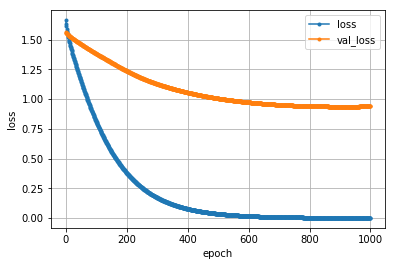

In [10]:
import matplotlib.pyplot as plt

loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## APPENDIX
本チュートリアルのために作成した仮装環境の構築コマンドを参考までに掲載しておきます。 Anaconda を利用し、以下のコマンドで仮想環境を構築しました。

    conda create -n ai-study python=3.6 python keras jupyter matplotlib
    conda activate ai-study
